## Assignments

**Implement simple RNN using numpy considering the architecture of RNN**

**Implement and evaluate simple RNN using recurrent layers from keras on IMDB data, show the training and validation curves along.** 


### What are they ? 

Recurrent Neural Networks (RNNs) are a kind of neural network that specialize in processing sequences. 

They’re often used in Natural Language Processing (NLP) tasks because of their effectiveness in handling text

### Why ? and Types ? 

One issue with vanilla neural nets (and also CNNs) is that they only work with pre-determined sizes: **they take fixed-size inputs and produce fixed-size outputs.** 

RNNs are useful because they let us have variable-length sequences as both inputs and outputs.
    
Here are a few examples of what RNNs can look like:

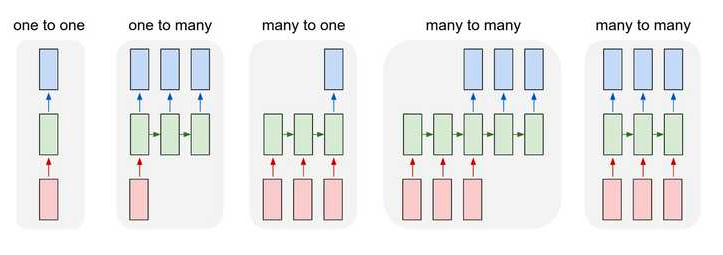

In [17]:
from IPython.display import Image
Image(filename='ex-08.png')

### Examples: 

- Machine Translation (e.g. Google Translate) is done with **“many to many”** RNNs. 
  The original text sequence is fed into an RNN, which then produces translated text as output.

- Sentiment Analysis (e.g. Is this a positive or negative review?) is often done with **“many to one”** RNNs. The text   to be analyzed is fed into an RNN, which then produces a single output classification (e.g. This is a positive     review).

## How ?

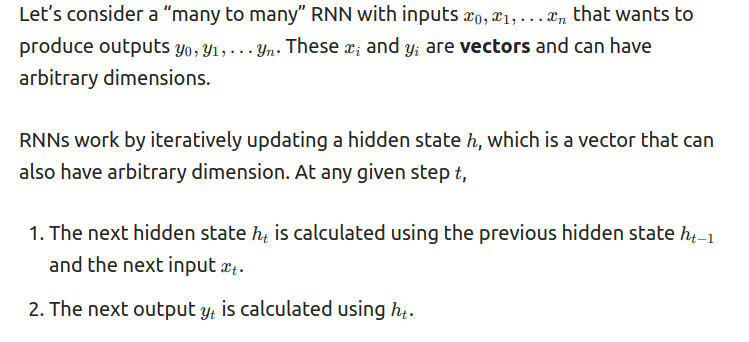

In [18]:
from IPython.display import Image
Image(filename='ex-08-1.png')

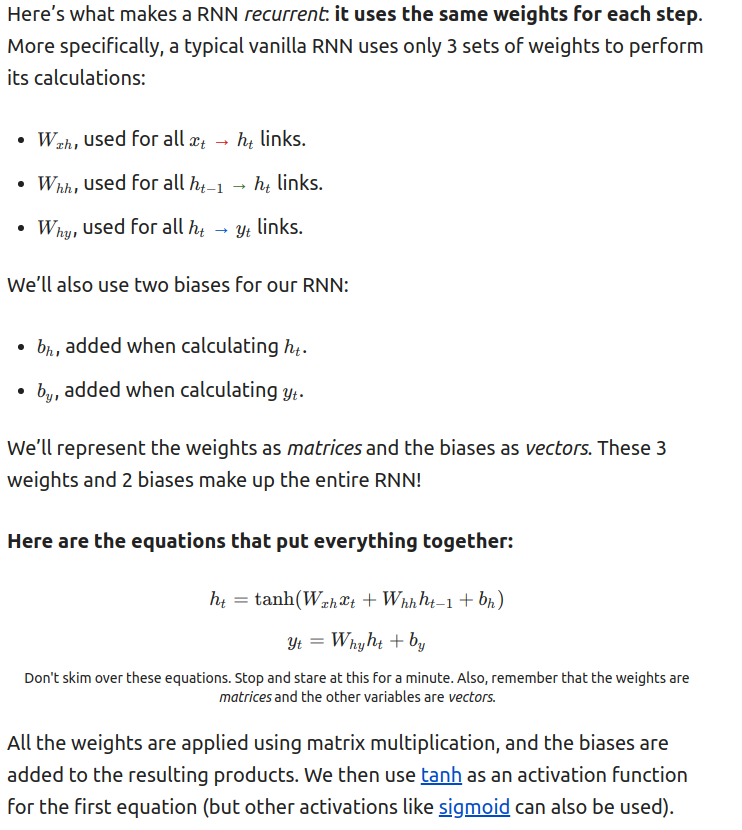

In [19]:
from IPython.display import Image
Image(filename='ex-08-2.png')

## Lets consider a problem; 

Let’s get our hands dirty! We’ll implement an RNN from scratch to perform a simple Sentiment Analysis task:

determining whether a given text string is positive or negative.

## Approach: 

Since this is a classification problem, we’ll use a “many to one” RNN. 

This is similar to the “many to many” RNN we discussed earlier, but it only uses the final hidden state to produce the one output y:

- Each x_i : will be a vector representing a word from the text.

- The output y will be a vector containing two numbers,
  one representing positive and the other negative. 
  
- We’ll apply Softmax to turn those values into probabilities and ultimately decide between positive / negative.

### How our data look like ? 

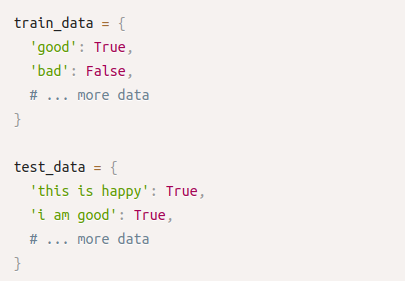

In [22]:
from IPython.display import Image
Image(filename='ex083.png')

#### We’ll have to do some pre-processing to get the data into a usable format. 

To start, we’ll construct a **vocabulary** of all words that exist in our data:

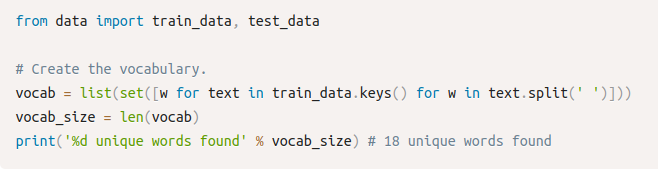

In [23]:
from IPython.display import Image
Image(filename='ex084.png')

**vocab** now holds a list of all words that appear in at least one training text.

Next, we’ll assign an integer index to represent each word in our vocab.

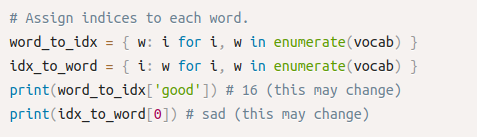

In [24]:
from IPython.display import Image
Image(filename='ex085.png')

We can now represent any given word with its corresponding integer index! 

This is necessary because RNNs can’t understand words - we have to give them numbers.

Finally, recall that each input x_i   to our RNN is a vector. 

We’ll use one-hot vectors, which contain all zeros except for a single one.

The “one” in each **one-hot vector** will be at the word’s corresponding integer index.

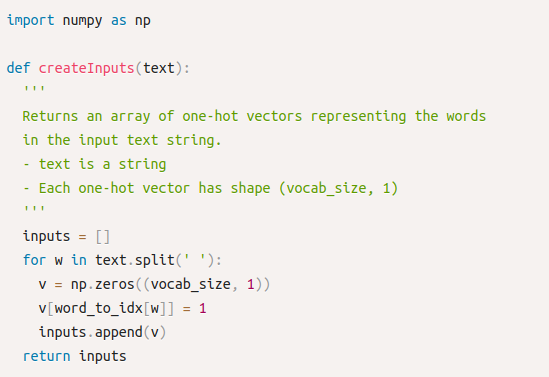

In [25]:
from IPython.display import Image
Image(filename='ex086.png')

**We’ll use createInputs() later to create vector inputs to pass in to our RNN.**

## Forward Propagation: 
   
   We’ll start by initializing the 3 weights and 2 biases our RNN needs:
    

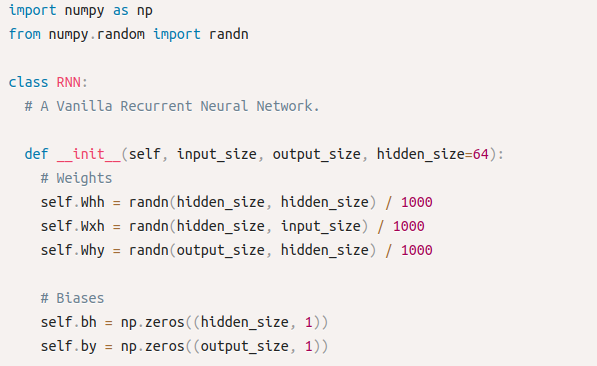

In [26]:
from IPython.display import Image
Image(filename='ex087.png')

**Note: We're dividing by 1000 to reduce the initial variance of our weights.** 
    
This is not the best way to initialize weights, but it's simple and works for this exercise.

We use np.random.randn() to initialize our weights from the standard normal distribution.

### Calculate hidden values and output y

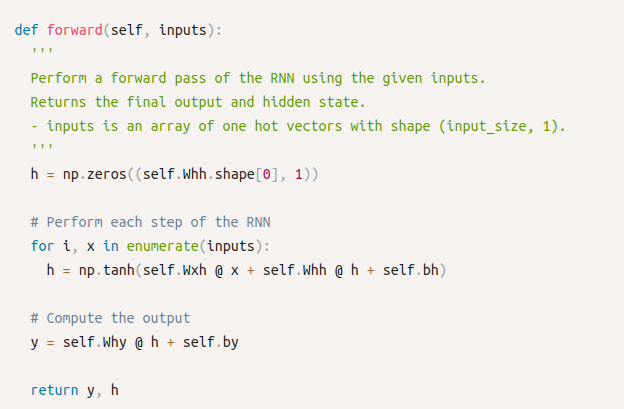

In [28]:
from IPython.display import Image
Image(filename='ex088.png')

In [24]:
import numpy as np
A = np.matrix('1 2; 3 4')
A

matrix([[1, 2],
        [3, 4]])

In [25]:
B = np.matrix('2 1; 4 5')
B

matrix([[2, 1],
        [4, 5]])

In [26]:
A@B

matrix([[10, 11],
        [22, 23]])

**Note that we initialized hh to the zero vector for the first step, 
since there’s no previous hh we can use at that point **

## Backproppagation: 

   In order to train our RNN, we first need a loss function.
   We’ll use cross-entropy loss, which is often paired with Softmax. 
   
   Here’s how we calculate it:
    L=−ln(pc)
    
   where pc is our RNN’s predicted probability for the correct class (positive or negative). 
   
   For example, if a positive text is predicted to be 90% positive by our RNN, the loss is:
   
   L=−ln(0.90)=0.105

Now that we have a loss, we’ll train our RNN using gradient descent to minimize loss. 

That means it’s time to derive some gradients!

- Let’s check at gradients for W{hy} b{y}

  which are only used to turn the final hidden state into the RNN’s output. We have:

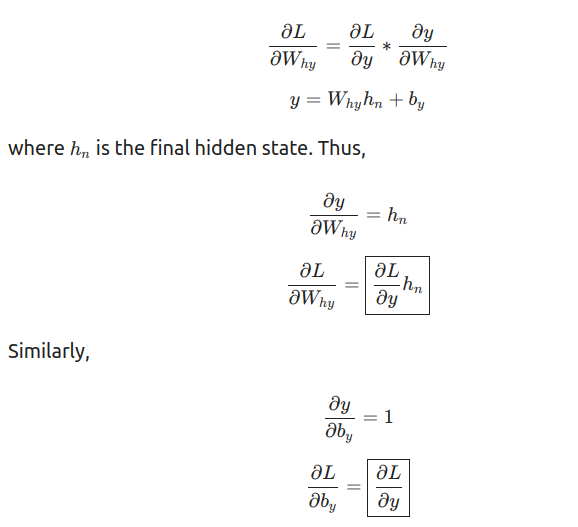

In [32]:
from IPython.display import Image
Image(filename='ex089.png')

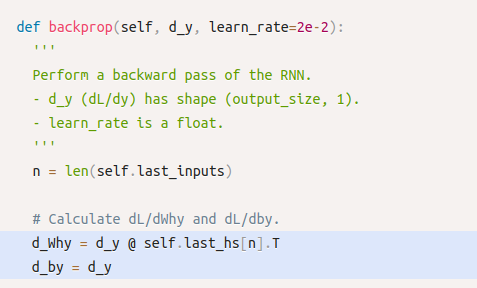

In [33]:
from IPython.display import Image
Image(filename='ex0890.png')

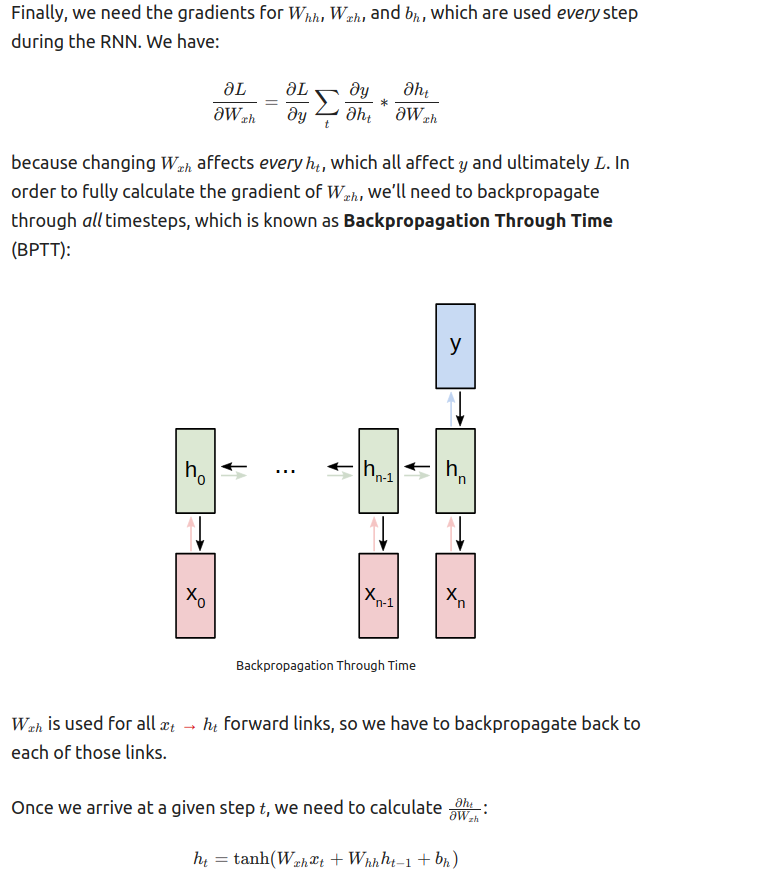

In [34]:
from IPython.display import Image
Image(filename='ex0891.png')

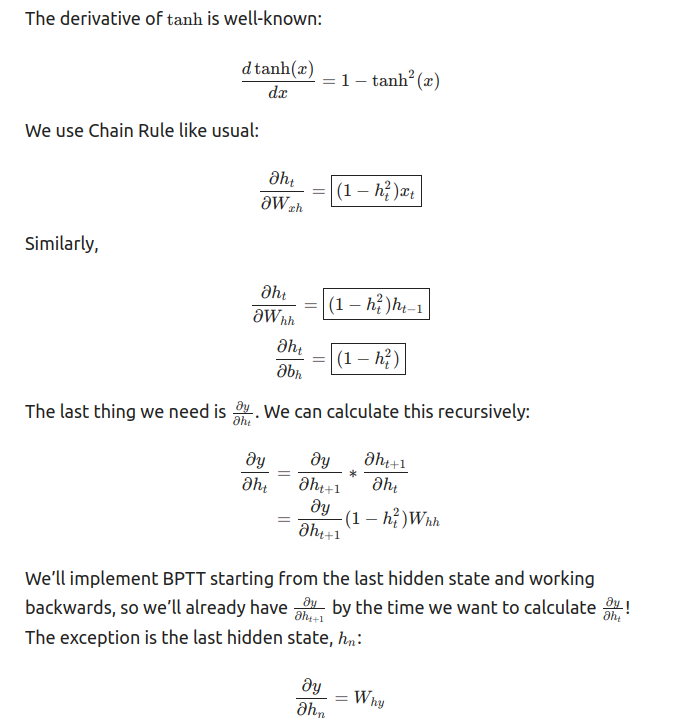

In [35]:
from IPython.display import Image
Image(filename='ex0892.png')

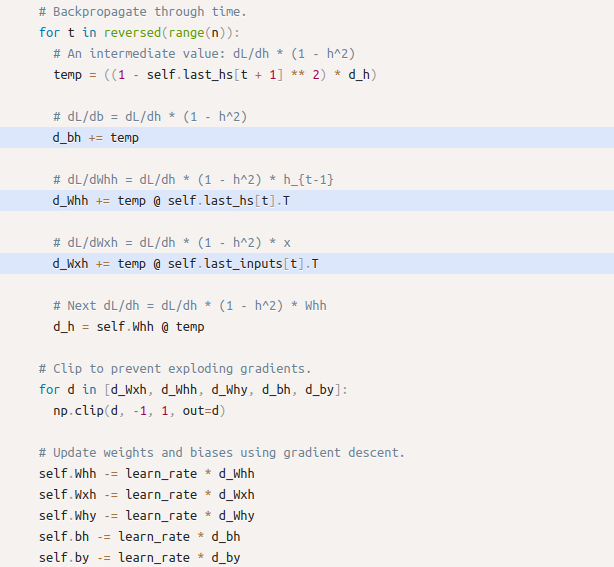

In [37]:
from IPython.display import Image
Image(filename='ex0893.png')

In [22]:
# clipping example 
import numpy as np
a = np.arange(10)
np.clip(a, 1, 8)

array([1, 1, 2, 3, 4, 5, 6, 7, 8, 8])

In [23]:
# another clipping example with 'out' argument
np.clip(a, 3, 6, out=a)

array([3, 3, 3, 3, 4, 5, 6, 6, 6, 6])

## So, Lets put the things together: 

### Dataset 

In [1]:
train_data = {
  'good': True,
  'bad': False,
  'happy': True,
  'sad': False,
  'not good': False,
  'not bad': True,
  'not happy': False,
  'not sad': True,
  'very good': True,
  'very bad': False,
  'very happy': True,
  'very sad': False,
  'i am happy': True,
  'this is good': True,
  'i am bad': False,
  'this is bad': False,
  'i am sad': False,
  'this is sad': False,
  'i am not happy': False,
  'this is not good': False,
  'i am not bad': True,
  'this is not sad': True,
  'i am very happy': True,
  'this is very good': True,
  'i am very bad': False,
  'this is very sad': False,
  'this is very happy': True,
  'i am good not bad': True,
  'this is good not bad': True,
  'i am bad not good': False,
  'i am good and happy': True,
  'this is not good and not happy': False,
  'i am not at all good': False,
  'i am not at all bad': True,
  'i am not at all happy': False,
  'this is not at all sad': True,
  'this is not at all happy': False,
  'i am good right now': True,
  'i am bad right now': False,
  'this is bad right now': False,
  'i am sad right now': False,
  'i was good earlier': True,
  'i was happy earlier': True,
  'i was bad earlier': False,
  'i was sad earlier': False,
  'i am very bad right now': False,
  'this is very good right now': True,
  'this is very sad right now': False,
  'this was bad earlier': False,
  'this was very good earlier': True,
  'this was very bad earlier': False,
  'this was very happy earlier': True,
  'this was very sad earlier': False,
  'i was good and not bad earlier': True,
  'i was not good and not happy earlier': False,
  'i am not at all bad or sad right now': True,
  'i am not at all good or happy right now': False,
  'this was not happy and not good earlier': False,
}

test_data = {
  'this is happy': True,
  'i am good': True,
  'this is not happy': False,
  'i am not good': False,
  'this is not bad': True,
  'i am not sad': True,
  'i am very good': True,
  'this is very bad': False,
  'i am very sad': False,
  'this is bad not good': False,
  'this is good and happy': True,
  'i am not good and not happy': False,
  'i am not at all sad': True,
  'this is not at all good': False,
  'this is not at all bad': True,
  'this is good right now': True,
  'this is sad right now': False,
  'this is very bad right now': False,
  'this was good earlier': True,
  'i was not happy and not good earlier': False,
}

## Build a Recurrent neural network model 

In [2]:
import numpy as np
from numpy.random import randn

class RNN:
  # A many-to-one Vanilla Recurrent Neural Network.

  def __init__(self, input_size, output_size, hidden_size=64):
    # Weights
    self.Whh = randn(hidden_size, hidden_size) / 1000
    self.Wxh = randn(hidden_size, input_size) / 1000
    self.Why = randn(output_size, hidden_size) / 1000

    # Biases
    self.bh = np.zeros((hidden_size, 1))
    self.by = np.zeros((output_size, 1))

  def forward(self, inputs):
    '''
    Perform a forward pass of the RNN using the given inputs.
    Returns the final output and hidden state.
    - inputs is an array of one hot vectors with shape (input_size, 1).
    '''
    h = np.zeros((self.Whh.shape[0], 1))

    self.last_inputs = inputs
    self.last_hs = { 0: h }

    # Perform each step of the RNN
    for i, x in enumerate(inputs):
      h = np.tanh(self.Wxh @ x + self.Whh @ h + self.bh)
      self.last_hs[i + 1] = h

    # Compute the output
    y = self.Why @ h + self.by

    return y, h

  def backprop(self, d_y, learn_rate=2e-2):
    '''
    Perform a backward pass of the RNN.
    - d_y (dL/dy) has shape (output_size, 1).
    - learn_rate is a float.
    '''
    n = len(self.last_inputs)

    # Calculate dL/dWhy and dL/dby.
    d_Why = d_y @ self.last_hs[n].T
    d_by = d_y

    # Initialize dL/dWhh, dL/dWxh, and dL/dbh to zero.
    d_Whh = np.zeros(self.Whh.shape)
    d_Wxh = np.zeros(self.Wxh.shape)
    d_bh = np.zeros(self.bh.shape)

    # Calculate dL/dh for the last h.
    # dL/dh = dL/dy * dy/dh
    d_h = self.Why.T @ d_y

    # Backpropagate through time.
    for t in reversed(range(n)):
      # An intermediate value: dL/dh * (1 - h^2)
      temp = ((1 - self.last_hs[t + 1] ** 2) * d_h)

      # dL/db = dL/dh * (1 - h^2)
      d_bh += temp

      # dL/dWhh = dL/dh * (1 - h^2) * h_{t-1}
      d_Whh += temp @ self.last_hs[t].T

      # dL/dWxh = dL/dh * (1 - h^2) * x
      d_Wxh += temp @ self.last_inputs[t].T

      # Next dL/dh = dL/dh * (1 - h^2) * Whh
      d_h = self.Whh @ temp

    # Clip to prevent exploding gradients.
    for d in [d_Wxh, d_Whh, d_Why, d_bh, d_by]:
      np.clip(d, -1, 1, out=d)

    # Update weights and biases using gradient descent.
    self.Whh -= learn_rate * d_Whh
    self.Wxh -= learn_rate * d_Wxh
    self.Why -= learn_rate * d_Why
    self.bh -= learn_rate * d_bh
    self.by -= learn_rate * d_by

In [4]:
import numpy as np
import random


# Create the vocabulary.
vocab = list(set([w for text in train_data.keys() for w in text.split(' ')]))
vocab_size = len(vocab)
print('%d unique words found' % vocab_size)

# Assign indices to each word.
word_to_idx = { w: i for i, w in enumerate(vocab) }
idx_to_word = { i: w for i, w in enumerate(vocab) }
# print(word_to_idx['good'])
# print(idx_to_word[0])

def createInputs(text):
  '''
  Returns an array of one-hot vectors representing the words in the input text string.
  - text is a string
  - Each one-hot vector has shape (vocab_size, 1)
  '''
  inputs = []
  for w in text.split(' '):
    v = np.zeros((vocab_size, 1))
    v[word_to_idx[w]] = 1
    inputs.append(v)
  return inputs

def softmax(xs):
  # Applies the Softmax Function to the input array.
  return np.exp(xs) / sum(np.exp(xs))

# Initialize our RNN!
rnn = RNN(vocab_size, 2)

def processData(data, backprop=True):
  '''
  Returns the RNN's loss and accuracy for the given data.
  - data is a dictionary mapping text to True or False.
  - backprop determines if the backward phase should be run.
  '''
  items = list(data.items())
  random.shuffle(items)

  loss = 0
  num_correct = 0

  for x, y in items:
    inputs = createInputs(x)
    target = int(y)

    # Forward
    out, _ = rnn.forward(inputs)
    probs = softmax(out)

    # Calculate loss / accuracy
    loss -= np.log(probs[target])
    num_correct += int(np.argmax(probs) == target)

    if backprop:
      # Build dL/dy
      d_L_d_y = probs
      d_L_d_y[target] -= 1

      # Backward
      rnn.backprop(d_L_d_y)

  return loss / len(data), num_correct / len(data)

18 unique words found


In [7]:
# Training loop
for epoch in range(3000):
  train_loss, train_acc = processData(train_data)

  if epoch % 100 == 99:
    print('--- Epoch %d' % (epoch + 1))
    print('Train:\tLoss %.3f | Accuracy: %.3f' % (train_loss, train_acc))

    test_loss, test_acc = processData(test_data, backprop=False)
    print('Test:\tLoss %.3f | Accuracy: %.3f' % (test_loss, test_acc))

--- Epoch 100
Train:	Loss 0.000 | Accuracy: 1.000
Test:	Loss 1.117 | Accuracy: 0.850
--- Epoch 200
Train:	Loss 0.000 | Accuracy: 1.000
Test:	Loss 1.112 | Accuracy: 0.850
--- Epoch 300
Train:	Loss 0.000 | Accuracy: 1.000
Test:	Loss 1.110 | Accuracy: 0.850
--- Epoch 400
Train:	Loss 0.000 | Accuracy: 1.000
Test:	Loss 1.106 | Accuracy: 0.850
--- Epoch 500
Train:	Loss 0.000 | Accuracy: 1.000
Test:	Loss 1.102 | Accuracy: 0.850
--- Epoch 600
Train:	Loss 0.000 | Accuracy: 1.000
Test:	Loss 1.098 | Accuracy: 0.850
--- Epoch 700
Train:	Loss 0.000 | Accuracy: 1.000
Test:	Loss 1.093 | Accuracy: 0.850
--- Epoch 800
Train:	Loss 0.000 | Accuracy: 1.000
Test:	Loss 1.089 | Accuracy: 0.850
--- Epoch 900
Train:	Loss 0.000 | Accuracy: 1.000
Test:	Loss 1.081 | Accuracy: 0.850
--- Epoch 1000
Train:	Loss 0.000 | Accuracy: 1.000
Test:	Loss 1.074 | Accuracy: 0.850
--- Epoch 1100
Train:	Loss 0.000 | Accuracy: 1.000
Test:	Loss 1.067 | Accuracy: 0.850
--- Epoch 1200
Train:	Loss 0.000 | Accuracy: 1.000
Test:	Loss 1

# Task-2:  Implement and evaluate simple RNN using recurrent layers from keras on IMDB data. 

# show the training and validation curves along. 


In [38]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.0'

## A first recurrent layer in Keras

The process we just naively implemented in Numpy corresponds to an actual Keras layer: the SimpleRNN layer:

In [39]:
from keras.layers import SimpleRNN

There is just one minor difference: SimpleRNN processes batches of sequences, like all other Keras layers, not just a single sequence like in our Numpy example. This means that it takes inputs of shape (batch_size, timesteps, input_features), rather than (timesteps, input_features).

Like all recurrent layers in Keras, SimpleRNN can be run in two different modes: it can return either the **full sequences of successive outputs for each timestep (a 3D tensor of shape (batch_size, timesteps, output_features))**, or it can return only the **last output for each input sequence (a 2D tensor of shape (batch_size, output_features))**. These two modes are controlled by the return_sequences constructor argument. Let's take a look at an example:

In [40]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [41]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


## It is sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network.

## In such a setup, you have to get all intermediate layers to return full sequences:

In [42]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


Now let's try to use such a model on the IMDB movie review classification problem. First,

## let's preprocess the data:

In [44]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


## Let's train a simple recurrent network using an Embedding layer and a SimpleRNN layer:

In [45]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/home/renuk/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.6182 - acc: 0.6361 - val_loss: 0.5692 - val_acc: 0.7136
Epoch 2/10
20000/20000 [==============================] - 19s 942us/step - loss: 0.3814 - acc: 0.8378 - val_loss: 0.3920 - val_acc: 0.8332
Epoch 3/10
20000/20000 [==============================] - 19s 937us/step - loss: 0.2935 - acc: 0.8831 - val_loss: 0.3764 - val_acc: 0.8346
Epoch 4/10
20000/20000 [==============================] - 18s 902us/step - loss: 0.2239 - acc: 0.9163 - val_loss: 0.3731 - val_acc: 0.8544
Epoch 5/10
20000/20000 [==============================] - 18s 902us/step - loss: 0.1715 - acc: 0.9374 - val_loss: 0.3801 - val_acc: 0.8514
Epoch 6/10
20000/20000 [==============================] - 18s 899us/step - loss: 0.1269 - acc: 0.9564 - val_loss: 0.4749 - val_acc: 0.8130
Epoch 7/10
20000/20000 [==============================] - 18s 913us/step - loss: 0.0846 - acc: 0.9729 - val_loss: 0.497

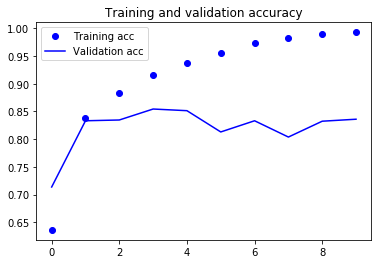

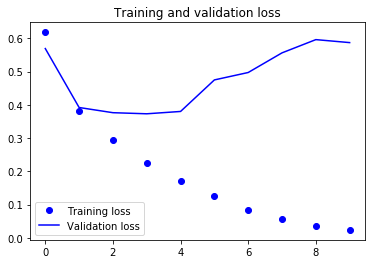

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# If you could remeber !!!

- first naive approach to this very dataset got us to 88%  accuracy.

- Unfortunately, our small recurrent network doesn't perform very well at all compared to this baseline (only up to 85% validation accuracy). 

- **Part of the problem is that our inputs only consider the first 500 words rather the full sequences** 

- hence our RNN has access to less information than our earlier baseline model. **The remainder of the problem is simply that SimpleRNN isn't very good at processing long sequences, like text**. 

- Other types of recurrent layers perform much better. Let's take a look at some more advanced layers.

# A concrete LSTM example in Keras

Now let's switch to more practical concerns: 

- we will set up a model using a LSTM layer and train it on the IMDB data. 

- Here's the network, similar to the one with SimpleRNN that we just presented. 

- We only specify the output dimensionality of the LSTM layer, and leave every other argument (there are lots) to the Keras defaults. Keras has good defaults, and things will almost always "just work" without you having to spend time tuning parameters by hand.

In [47]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/home/renuk/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.5230 - acc: 0.7540 - val_loss: 0.3404 - val_acc: 0.8640
Epoch 2/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.2952 - acc: 0.8870 - val_loss: 0.3211 - val_acc: 0.8614
Epoch 3/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.2321 - acc: 0.9154 - val_loss: 0.3566 - val_acc: 0.8678
Epoch 4/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.1993 - acc: 0.9275 - val_loss: 0.3751 - val_acc: 0.8410
Epoch 5/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.1753 - acc: 0.9375 - val_loss: 0.2989 - val_acc: 0.8760
Epoch 6/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.1574 - acc: 0.9437 - val_loss: 0.3176 - val_acc: 0.8716
Epoch 7/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.1469 - acc: 0.9488 - val_loss: 0.3297 - val_acc:

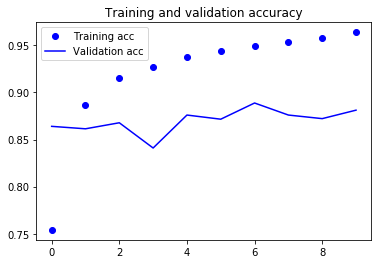

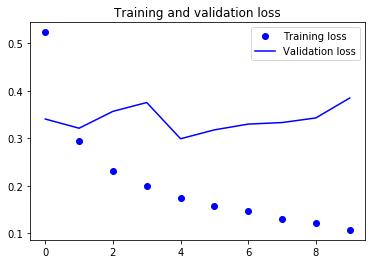

In [48]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()